Hovmoller of Temp

In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
#from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage
#import seawater as sw

import dask.diagnostics
dask.diagnostics.ProgressBar().register()

from dask.distributed import Client

import cmocean.cm as cmocean


Populating the interactive namespace from numpy and matplotlib


In [2]:
#client = Client()
#client

In [3]:
#extract the MOM model grid info - 50 and 75 vertical levels
hgrid_file ='/g/data/hh5/tmp/pas561/gfdl_nyf_1080/mom025_ocean_grid.nc'

# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
area_t = nc.variables['area_t'][:]
dxt = nc.variables['dxt'][:]
dyt = nc.variables['dyt'][:]
kmu = nc.variables['kmu'][:]
kmt = nc.variables['kmt'][:]
ht = nc.variables['ht'][:]
fcor = nc.variables['f_coriolis'][:]
nc.close() # close the file
#print geolon_t.shape

fh=fcor/ht
#print fh.shape

vgrid_file ='/g/data/hh5/tmp/pas561/gfdl_nyf_1080/ocean.ncra501-520.nc'

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
sw_ocean = nc.variables['sw_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
yu_ocean = nc.variables['yu_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
potrho = nc.variables['potrho'][:]
nc.close() # close the file
#print st_ocean.shape
#print potrho.shape
#print yt_ocean.shape

mom025_yu_ocean=yu_ocean
mom025_potrho=potrho

In [4]:
#A = xr.DataArray(np.arange(100))
#A.cumsum(axis=0)
print (xr.__version__)

0.11.0


In [5]:
#load gmoc in rho space
#NYFCntrlDir = '/g/data3/hh5/tmp/cosima/mom01v5/kds75_cp/'
#NYFPertDir = '/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/'
NYFCntrlDir = '/g/data/hh5/tmp/pas561/kds75_cp_ann/store_ext/'
NYFPertDir = '/g/data/hh5/tmp/pas561/kds75_wp2/2yr/store_ext/'

#Ocean_File = os.path.join(NYFPertDir,'output*/ocean.nc')
#print Ocean_File
#pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
#print pert.ty_trans_rho.shape

vgrid_file ='/g/data/hh5/tmp/pas561/kds75_cp_ann/ocean_130.nc'
nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
yt_ocean2 = nc.variables['yt_ocean'][:]
yu_ocean2 = nc.variables['yu_ocean'][:]
xt_ocean2 = nc.variables['xt_ocean'][:]
xu_ocean2 = nc.variables['xu_ocean'][:]
st_ocean2 = nc.variables['st_ocean'][:]
#potrho = nc.variables['potrho'][:]
nc.close() # close the file
#print potrho.shape
#print yu_ocean.shape


hgrid_file ='/g/data/hh5/tmp/pas561/mom01_unmasked_ocean_grid.nc'
# Extract the variables
nc = Dataset(hgrid_file, mode='r') # file handle, open in read only mode
geolon_t2 = nc.variables['geolon_t'][:]
geolat_t2 = nc.variables['geolat_t'][:]
nc.close() # close the file

#of=os.path.join(NYFCntrlDir,'psi_ann.npy')
#cntrl_psi=np.load(of)
#print(cntrl_psi.shape)

#of=os.path.join(NYFPertDir,'psi_ann.npy')
#pert_psi=np.load(of)
#print(pert_psi.shape)



In [6]:
Ocean_File = os.path.join(NYFCntrlDir,'ocean_*.nc')
#Ocean_File = os.path.join(NYFCntrlDir,'ocean_*.nc')
print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,concat_dim= 'time').age_global
print(cntrl.shape)

x1=np.argwhere(xt_ocean2<-40)
x2=np.argwhere(xt_ocean2<15)
x1=np.asscalar(x1[-1])
x2=np.asscalar(x2[-1])

y1=np.argwhere(yt_ocean2<-70)
y2=np.argwhere(yt_ocean2<-63) #63
y1=np.asscalar(y1[-1])
y2=np.asscalar(y2[-1])

cAz=cntrl[:,:,y1:y2,x1:x2].mean('yt_ocean').mean('xt_ocean').load()
of=os.path.join(NYFCntrlDir,'cAz_141to155.npy')
a=np.save(of,cAz)


/g/data/hh5/tmp/pas561/kds75_cp_ann/store_ext/ocean_*.nc


/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/xarray/coding/times.py:122: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)


[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100

/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 32.0s


In [7]:
Ocean_File = os.path.join(NYFPertDir,'ocean_*.nc')
print(Ocean_File)
pert=xr.open_mfdataset(Ocean_File,concat_dim= 'time').age_global
print(pert.shape)

x1=np.argwhere(xt_ocean2<-40)
x2=np.argwhere(xt_ocean2<15)
x1=np.asscalar(x1[-1])
x2=np.asscalar(x2[-1])

y1=np.argwhere(yt_ocean2<-70)
y2=np.argwhere(yt_ocean2<-63) #63
y1=np.asscalar(y1[-1])
y2=np.asscalar(y2[-1])

pAz=pert[:,:,y1:y2,x1:x2].mean('yt_ocean').mean('xt_ocean').load()
print(pAz.shape)
of=os.path.join(NYFPertDir,'pAz_141to154.npy')
a=np.save(of,pAz)

/g/data/hh5/tmp/pas561/kds75_wp2/2yr/store_ext/ocean_*.nc
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Complete

In [8]:
Ocean_File = os.path.join(NYFCntrlDir,'ocean_*.nc')
print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time')
print(cntrl.temp.shape)

Ocean_File = os.path.join(NYFPertDir,'ocean_*.nc')
print(Ocean_File)
pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time')
print(pert.temp.shape)

/g/data/hh5/tmp/pas561/kds75_cp_ann/store_ext/ocean_*.nc
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed

In [9]:
#store time-series between 60-65S and 40W-15E for hovmoeller
x1=np.argwhere(xt_ocean2<-40)
x2=np.argwhere(xt_ocean2<15)
x1=np.asscalar(x1[-1])
x2=np.asscalar(x2[-1])

y1=np.argwhere(yt_ocean2<-70)
y2=np.argwhere(yt_ocean2<-63) #63
y1=np.asscalar(y1[-1])
y2=np.asscalar(y2[-1])

#this is inaccurate ... area weight for yt_ocean
cTz=cntrl.temp[:,:,y1:y2,x1:x2].mean('yt_ocean').mean('xt_ocean').load()
print(cTz.shape)

pTz=pert.temp[:,:,y1:y2,x1:x2].mean('yt_ocean').mean('xt_ocean').load()
print(pTz.shape)

of=os.path.join(NYFCntrlDir,'cTz_141to155.npy')
a=np.save(of,cTz)

of=os.path.join(NYFPertDir,'pTz_141to154.npy')
a=np.save(of,pTz)

#this is inaccurate ... area weight for yt_ocean
cSz=cntrl.salt[:,:,y1:y2,x1:x2].mean('yt_ocean').mean('xt_ocean').load()
print(cSz.shape)

pSz=pert.salt[:,:,y1:y2,x1:x2].mean('yt_ocean').mean('xt_ocean').load()
print(pSz.shape)

of=os.path.join(NYFCntrlDir,'cSz_141to155.npy')
a=np.save(of,cSz)

of=os.path.join(NYFPertDir,'pSz_141to154.npy')
a=np.save(of,pSz)


[########################################] | 100% Completed | 31.4s
(15, 75)
[########################################] | 100% Completed | 29.9s
(14, 75)
[########################################] | 100% Completed | 28.1s
(15, 75)
[########################################] | 100% Completed | 26.4s
(14, 75)


In [9]:
NYFCntrlDir2 = '/g/data3/hh5/tmp/pas561/kds75_cp_ann/store_ext/'
NYFCntrlDir = '/g/data3/hh5/tmp/pas561/kds75_cp_ann'

of=os.path.join(NYFCntrlDir,'cTz.npy')
tmp=np.load(of)
of=os.path.join(NYFCntrlDir2,'cTz_141to155.npy')
tmp2=np.load(of)
tmp2

mom01_cTz=numpy.concatenate((tmp,tmp2[:-1]),axis=0)
print(mom01_cTz.shape)

of=os.path.join(NYFCntrlDir,'cSz.npy')
tmp=np.load(of)
of=os.path.join(NYFCntrlDir2,'cSz_141to155.npy')
tmp2=np.load(of)
tmp2

mom01_cSz=numpy.concatenate((tmp,tmp2[:-1]),axis=0)
print(mom01_cSz.shape)

of=os.path.join(NYFCntrlDir,'cAz.npy')
tmp=np.load(of)
of=os.path.join(NYFCntrlDir2,'cAz_141to155.npy')
tmp2=np.load(of)
tmp2

mom01_cAz=numpy.concatenate((tmp,tmp2[:-1]),axis=0)
print(mom01_cAz.shape)

(43, 75)
(43, 75)
(43, 75)


In [10]:
NYFPertDir = '/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/'
NYFPertDir2 = '/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/store_ext/'

of=os.path.join(NYFPertDir,'pTz.npy')
tmp=np.load(of)
of=os.path.join(NYFPertDir2,'pTz_141to154.npy')
tmp2=np.load(of)
tmp2

mom01_pTz=numpy.concatenate((tmp,tmp2),axis=0)
print(mom01_pTz.shape)

of=os.path.join(NYFPertDir,'pSz.npy')
tmp=np.load(of)
of=os.path.join(NYFPertDir2,'pSz_141to154.npy')
tmp2=np.load(of)
tmp2

mom01_pSz=numpy.concatenate((tmp,tmp2),axis=0)
print(mom01_pSz.shape)

of=os.path.join(NYFPertDir,'pAz.npy')
tmp=np.load(of)
of=os.path.join(NYFPertDir2,'pAz_141to154.npy')
tmp2=np.load(of)
tmp2

mom01_pAz=numpy.concatenate((tmp,tmp2),axis=0)
print(mom01_pAz.shape)

(43, 75)
(43, 75)
(43, 75)


NYFCntrlDir = '/g/data3/hh5/tmp/pas561/kds75_cp_ann/store_ext/'
NYFPertDir = '/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/store_ext/'

of=os.path.join(NYFPertDir,'pTz_141to154.npy')
mom01_pTz=np.load(of)
of=os.path.join(NYFPertDir,'pSz_141to154.npy')
mom01_pSz=np.load(of)
of=os.path.join(NYFPertDir,'pAz_141to154.npy')
mom01_pAz=np.load(of)

of=os.path.join(NYFCntrlDir,'cTz_141to155.npy')
mom01_cTz=np.load(of)
of=os.path.join(NYFCntrlDir,'cSz_141to155.npy')
mom01_cSz=np.load(of)
of=os.path.join(NYFCntrlDir,'cAz_141to155.npy')
mom01_cAz=np.load(of)

print(mom01_cTz.shape,mom01_cTz.shape,mom01_cAz.shape)
print(mom01_pTz.shape,mom01_pTz.shape,mom01_pAz.shape)

In [3]:
#of=os.path.join(NYFCntrlDir,'cTz.npy')
#cTz=np.load(of)
#print(cTz.shape)

#of=os.path.join(NYFPertDir,'pTz.npy')
#pTz=np.load(of)
#print(pTz.shape)

#cTz_ann=np.zeros((19,75))
#pTz_ann=np.zeros((19,75))

#for yr in range(0,19):
#    if yr<1:
#        #first year is only 9 months ... use first 3 months of next year
#        t1=0
#        t2=4
#    elif yr<2:
#        t1=3
#        t2=7
#    else:
#        t1=t2
#        t2=t2+4
    
    #print seasons[t1:t2]
    
#    cTz_ann[yr,:]=np.mean(cTz[t1:t2,:],axis=0)
#    pTz_ann[yr,:]=np.mean(pTz[t1:t2,:],axis=0)


(43,)
(43, 75)
(43, 75)


/g/data/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in divide


Text(0.5,1,'d) MOM01 Age % Anomaly')

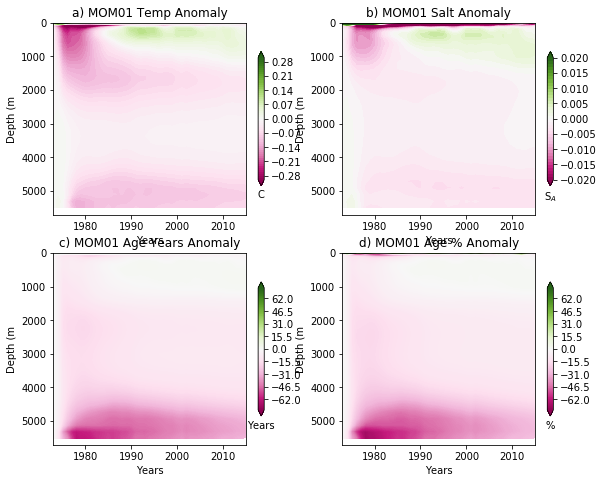

In [12]:
#plot temp hovmoeller of depth vs time
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

yrs=np.arange(1973,2016,1)
yrs=np.arange(0,77,1)

clev = np.arange(-.3,.31,.01)

plt.subplot(211)
#print clev

time = np.arange(0,43,1)
print(time.shape)
print(mom01_pTz.shape)

wp_os=0

a=mom01_pTz-mom01_cTz
print(a.shape)

yrs=np.arange(1973,2017,1)

plt.subplot(321)
plt.contourf(yrs[0:43],st_ocean2,a.T,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('C')
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='a) MOM01 Temp Anomaly'
plt.title(tit)


a=mom01_pSz-mom01_cSz

clev = np.arange(-.02,.021,.001)

plt.subplot(322)
plt.contourf(yrs[0:43],st_ocean2,a.T,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('S$_A$')
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='b) MOM01 Salt Anomaly'
plt.title(tit)

a=mom01_pAz-mom01_cAz

clev = np.arange(-75,75.5,.5)

plt.subplot(323)
plt.contourf(yrs[0:43],st_ocean2,a.T,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Years')
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='c) MOM01 Age Years Anomaly'
plt.title(tit)

a=(mom01_pAz-mom01_cAz[wp_os:mom01_pAz.shape[0]+wp_os,:])/mom01_cAz[wp_os:mom01_pAz.shape[0]+wp_os,:]*100

clev = np.arange(-75,75.5,.5)

plt.subplot(324)
plt.contourf(yrs[0:43],st_ocean2,a.T,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('%')
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='d) MOM01 Age % Anomaly'
plt.title(tit)


In [5]:
vgrid_file ='/g/data/hh5/tmp/pas561/gfdl_nyf_1080/ocean.ncra501-520.nc'

nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
yt_ocean = nc.variables['yt_ocean'][:]
yu_ocean = nc.variables['yu_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
xu_ocean = nc.variables['xu_ocean'][:]
nc.close() # close the file
#print potrho.shape
#print yt_ocean.shape

In [6]:
#store time-series between 60-65S and 40W-15E for hovmoeller
x1=np.argwhere(xt_ocean<-40)
x2=np.argwhere(xt_ocean<15)
x1=np.asscalar(x1[-1])
x2=np.asscalar(x2[-1])

y1=np.argwhere(yt_ocean<-70)
y2=np.argwhere(yt_ocean<-63) #63
y1=np.asscalar(y1[-1])
y2=np.asscalar(y2[-1])

In [16]:
NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

Ocean_File = os.path.join(NYFCntrlDir,'Tdim_output197*/ocean__*.nc')
#print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(cntrl.salt.shape)

Ocean_File = os.path.join(NYFCntrlDir,'output*/ocean__*.nc')
#print(Ocean_File)
cntrl2=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print(cntrl2.salt.shape)

#this is inaccurate ... area weight for yt_ocean
cSz=cntrl.salt[:,:,y1:y2,x1:x2].mean('yt_ocean').mean('xt_ocean').load()
cSz2=cntrl2.salt[:,:,y1:y2,x1:x2].mean('yt_ocean').mean('xt_ocean').load()
print(cSz.shape)
print(cSz2.shape)

np_cSz=np.concatenate((cSz,cSz2),axis=0)
print(np_cSz.shape)

of=os.path.join(NYFCntrlDir,'cSz.npy')
a=np.save(of,np_cSz)


ValueError: Could not find any dimension coordinates to use to order the datasets for concatenation

In [ ]:
Ocean_File = os.path.join(NYFPertDir,'output*/ocean__*.nc')
pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print(pert.salt.shape)

#np_pTz=pert.temp[:,:,y1:y2,x1:x2].mean('yt_ocean').mean('xt_ocean').load()
#print(np_pTz.shape)

#of=os.path.join(NYFPertDir,'pTz.npy')
#a=np.save(of,np_pTz)

np_pSz=pert.salt[:,:,y1:y2,x1:x2].mean('yt_ocean').mean('xt_ocean').load()
print(np_pSz.shape)

of=os.path.join(NYFPertDir,'pSz.npy')
a=np.save(of,np_pSz)


In [ ]:
#do oxygen
#Ocean_File = os.path.join(NYFCntrlDir,'Tdim_output19*/ocean_bgc_carbon*.nc')
#cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)

#Ocean_File = os.path.join(NYFCntrlDir,'output*/ocean_bgc_carbon*.nc')
#cntrl2=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)

Ocean_File = os.path.join(NYFPertDir,'output*/ocean_bgc_carbon*.nc')
pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)

#cOz=cntrl.o2[:,:,y1:y2,x1:x2].mean('yt_ocean').mean('xt_ocean').load()
#cOz2=cntrl2.o2[:,:,y1:y2,x1:x2].mean('yt_ocean').mean('xt_ocean').load()
#np_cOz=np.concatenate((cOz,cOz2),axis=0)

#of=os.path.join(NYFCntrlDir,'cOz.npy')
#a=np.save(of,np_cOz)

np_pOz=pert.o2[:,:,y1:y2,x1:x2].mean('yt_ocean').mean('xt_ocean').load()

of=os.path.join(NYFPertDir,'pOz.npy')
a=np.save(of,np_pOz)

#of=os.path.join(NYFCntrlDir,'cOz.npy')
#nonp_cOz=np.load(of)
#of=os.path.join(NYFPertDir,'pOz.npy')
#nonp_pOz=np.load(of)


In [31]:
NYFCntrlDir = '/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0_wp2/'

Ocean_File = os.path.join(NYFCntrlDir,'output*/ocean__*.nc')
print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
#print(cntrl.temp.shape)

Ocean_File = os.path.join(NYFPertDir,'output*/ocean__*.nc')
pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
#print(pert.temp.shape)



#this is inaccurate ... area weight for yt_ocean
nonp_cTz=cntrl.temp[:,:,y1:y2,x1:x2].mean('yt_ocean').mean('xt_ocean').load()
print(nonp_cTz.shape)

nonp_pTz=pert.temp[:,:,y1:y2,x1:x2].mean('yt_ocean').mean('xt_ocean').load()
print(nonp_pTz.shape)

of=os.path.join(NYFCntrlDir,'cTz.npy')
a=np.save(of,nonp_cTz)

of=os.path.join(NYFPertDir,'pTz.npy')
a=np.save(of,nonp_pTz)


/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0/output*/ocean__*.nc


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.01/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


(50, 50)
(44, 50)


In [11]:
#this is inaccurate ... area weight for yt_ocean
nonp_cSz=cntrl.salt[:,:,y1:y2,x1:x2].mean('yt_ocean').mean('xt_ocean').load()
print(nonp_cSz.shape)

nonp_pSz=pert.salt[:,:,y1:y2,x1:x2].mean('yt_ocean').mean('xt_ocean').load()
print(nonp_pSz.shape)

of=os.path.join(NYFCntrlDir,'cSz.npy')
a=np.save(of,nonp_cSz)

of=os.path.join(NYFPertDir,'pSz.npy')
a=np.save(of,nonp_pSz)

(29, 75)


KeyboardInterrupt: 

In [ ]:
NYFCntrlDir = '/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0/'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data1/v45/pas561/mom/archive/wombat_jul15b_r0_wp2/'

Ocean_File = os.path.join(NYFCntrlDir,'output*/ocean_bgc_carbon*.nc')
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)

#Ocean_File = os.path.join(NYFPertDir,'output*/ocean_bgc_carbon*.nc')
#pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print(cntrl.o2.shape)
nonp_cOz=cntrl.o2[:,:,y1:y2,x1:x2].mean('yt_ocean').mean('xt_ocean').load()
#nonp_pOz=pert.o2[:,:,y1:y2,x1:x2].mean('yt_ocean').mean('xt_ocean').load()

of=os.path.join(NYFCntrlDir,'cOz.npy')
a=np.save(of,nonp_cOz)

#of=os.path.join(NYFPertDir,'pOz.npy')
#a=np.save(of,nonp_pOz)


In [13]:
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0_wp2/'
of=os.path.join(NYFPertDir,'pTz.npy')
nonp_pTz=np.load(of)
of=os.path.join(NYFPertDir,'pOz.npy')
nonp_pOz=np.load(of)
of=os.path.join(NYFPertDir,'pSz.npy')
nonp_pSz=np.load(of)

NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jul15b_r0/'
of=os.path.join(NYFCntrlDir,'cTz.npy')
nonp_cTz=np.load(of)
of=os.path.join(NYFCntrlDir,'cOz.npy')
nonp_cOz=np.load(of)
of=os.path.join(NYFCntrlDir,'cSz.npy')
nonp_cSz=np.load(of)

NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'
of=os.path.join(NYFPertDir,'pTz.npy')
np_pTz=np.load(of)
of=os.path.join(NYFPertDir,'pOz.npy')
np_pOz=np.load(of)
of=os.path.join(NYFPertDir,'pSz.npy')
np_pSz=np.load(of)

NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/'
of=os.path.join(NYFCntrlDir,'cTz.npy')
np_cTz=np.load(of)
of=os.path.join(NYFCntrlDir,'cOz.npy')
np_cOz=np.load(of)
of=os.path.join(NYFCntrlDir,'cSz.npy')
np_cSz=np.load(of)


In [7]:
#deal with corrupted control file in 1973
print('here4',nonp_cOz[36:48,:])
print('here4',nonp_cOz[48:60,:])
nonp_cOz[36:48,:]=nonp_cOz[48:60,:]

('here4', array([[319.98447, 312.7911 , 301.86765, 285.6713 , 275.28864, 266.05548,
        254.90756, 241.48224, 226.7268 , 212.7649 , 201.8282 , 193.606  ,
        187.11812, 182.14539, 178.86917, 176.74591, 175.15927, 173.7278 ,
        172.44234, 171.01353, 169.56325, 168.00728, 166.51616, 165.25562,
        164.29527, 163.67886, 163.35193, 163.33153, 163.60284, 164.22351,
        165.18568, 166.40756, 167.84698, 169.39229, 170.95976, 172.49446,
        173.96498, 175.37239, 176.70174, 177.98665, 179.26474, 180.52391,
        181.85121, 183.29254, 184.96028, 186.91101, 188.9157 , 190.65182,
        192.82588, 193.06755],
       [343.8894 , 341.4102 , 326.92386, 294.1826 , 274.7526 , 262.40872,
        250.43468, 236.75122, 221.94876, 208.37624, 198.11417, 190.64297,
        184.93979, 180.71559, 178.11159, 176.32315, 174.8574 , 173.4716 ,
        172.18477, 170.77135, 169.314  , 167.77087, 166.295  , 165.06502,
        164.13902, 163.53828, 163.22745, 163.2295 , 163.52876, 164.1721

In [14]:
np_cOz_ann=np.zeros((50,50))
np_pOz_ann=np.zeros((44,50))

nonp_cOz_ann=np.zeros((50,50))
nonp_pOz_ann=np.zeros((44,50))

print(np_cOz.shape,np_cOz_ann.shape)
t1=0
for yr in range(0,50):
    #print seasons[t1:t2]
    
    np_cOz_ann[yr,:]=np.mean(np_cOz[t1:t1+12,:],axis=0)
    nonp_cOz_ann[yr,:]=np.mean(nonp_cOz[t1:t1+12,:],axis=0)
    t1=t1+12

    
print(np_pOz.shape)
t1=0
for yr in range(0,44):
    #print seasons[t1:t2]
    
    np_pOz_ann[yr,:]=np.mean(np_pOz[t1:t1+12,:],axis=0)
    nonp_pOz_ann[yr,:]=np.mean(nonp_pOz[t1:t1+12,:],axis=0)
    t1=t1+12
    
    #print(t1)

((600, 50), (50, 50))
(528, 50)


/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.10/lib/python2.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


(44,)
(44, 50)
(44, 50)
(44, 50)
(44, 50)


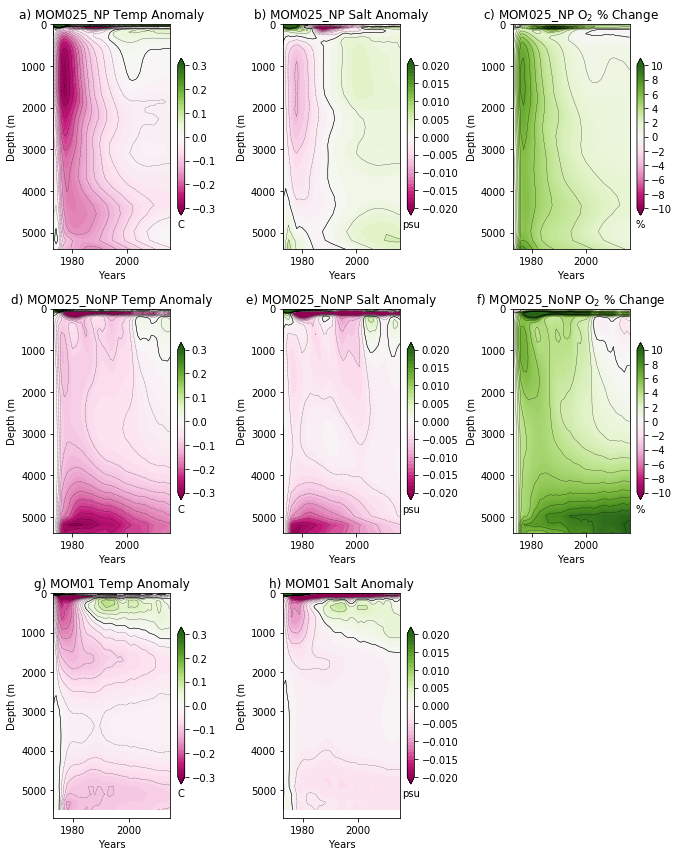

In [18]:
#plot temp hovmoeller of depth vs time
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

yrs=np.arange(1973,2017,1)
print(yrs.shape)

wp_os=3

a=np_pTz-np_cTz[0+wp_os:np_pTz.shape[0]+wp_os,:]
print(a.shape)

clev = np.arange(-.3,.31,.01)

plt.subplot(331)
plt.contourf(yrs[0:44],st_ocean,a[0:44,:].T,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(ticks=np.arange(-.3,.31,.1),orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('C')
plt.contour(yrs[0:44],st_ocean,a[0:44,:].T,levels=np.arange(-.3,.325,.025),colors='k',linewidths=0.25)
plt.contour(yrs[0:44],st_ocean,a[0:44,:].T,levels=[0.0,],colors='k',linewidths=0.5)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='a) MOM025_NP Temp Anomaly'
plt.title(tit)

wp_os=3

a=np_pSz-np_cSz[0+wp_os:np_pSz.shape[0]+wp_os,:]
print(a.shape)
clev = np.arange(-.02,.021,.001)

plt.subplot(332)
plt.contourf(yrs[0:44],st_ocean,a[0:44,:].T,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('psu')
plt.contour(yrs[0:44],st_ocean,a[0:44,:].T,levels=np.arange(-.02,.0225,.0025),colors='k',linewidths=0.25)
plt.contour(yrs[0:44],st_ocean,a[0:44,:].T,levels=[0.0,],colors='k',linewidths=0.5)

#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='b) MOM025_NP Salt Anomaly'
plt.title(tit)

#print('here',np_pOz_ann.shape,np_cOz_ann.shape,nonp_pOz_ann.shape[0])
a=(np_pOz_ann-np_cOz_ann[wp_os:np_pOz_ann.shape[0]+wp_os,:])/np_cOz_ann[wp_os:np_pOz_ann.shape[0]+wp_os,:]*100
#print('here',a.shape,st_ocean.shape)

#a=(np_pOz-np_cOz[36:np_pOz.shape[0]+36,:])/np_cOz[36:np_pOz.shape[0]+36,:]*100

clev = np.arange(-10,10.1,.1)
mnths=np.arange(0,492,1)
plt.subplot(333)
#plt.contourfmnths[0:480],st_ocean,a[0:480,:].T,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contourf(yrs[0:44],st_ocean,a[0:44,:].T,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(ticks=np.arange(-10,12,2),orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('%')
plt.contour(yrs[0:44],st_ocean,a[0:44,:].T,levels=np.arange(-10,12,1),colors='k',linewidths=0.25)
plt.contour(yrs[0:44],st_ocean,a[0:44,:].T,levels=[0.0,],colors='k',linewidths=0.5)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m')
plt.xlabel('Years')
#plt.xlim([-75,85])
plt.title('c) MOM025_NP O$_2$ % Change')

a=nonp_pTz-nonp_cTz[0+wp_os:nonp_pTz.shape[0]+wp_os,:]
print(a.shape)

clev = np.arange(-.3,.31,.01)
plt.subplot(334)
plt.contourf(yrs[0:44],st_ocean,a[0:44,:].T,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(ticks=np.arange(-.3,.4,.1),orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('C')
plt.contour(yrs[0:44],st_ocean,a[0:44,:].T,levels=np.arange(-.3,.325,.025),colors='k',linewidths=0.25)
plt.contour(yrs[0:44],st_ocean,a[0:44,:].T,levels=[0.0,],colors='k',linewidths=0.5)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='d) MOM025_NoNP Temp Anomaly'
plt.title(tit)

a=nonp_pSz-nonp_cSz[0+wp_os:nonp_pSz.shape[0]+wp_os,:]
print(a.shape)
clev = np.arange(-.02,.021,.001)

plt.subplot(335)
plt.contourf(yrs[0:44],st_ocean,a[0:44,:].T,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('psu')
plt.contour(yrs[0:44],st_ocean,a[0:44,:].T,levels=np.arange(-.02,.0225,.0025),colors='k',linewidths=0.25)
plt.contour(yrs[0:44],st_ocean,a[0:44,:].T,levels=[0.0,],colors='k',linewidths=0.5)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='e) MOM025_NoNP Salt Anomaly'
plt.title(tit)


#print('here2',nonp_pOz_ann.shape,nonp_cOz_ann.shape,nonp_pOz_ann.shape[0])
#print('here2',a.shape)
a=(nonp_pOz_ann-nonp_cOz_ann[wp_os:nonp_pOz_ann.shape[0]+wp_os,:])/nonp_cOz_ann[wp_os:nonp_pOz_ann.shape[0]+wp_os,:]*100
#aa=(nonp_pOz_ann[0,:]-nonp_cOz_ann[3,:])/nonp_cOz_ann[3,:]*100
#print('here3',nonp_pOz_ann[0,:],nonp_cOz_ann[wp_os,:],aa[:],a[0,:])
#print('here3',nonp_pOz_ann[1,:],nonp_cOz_ann[wp_os+1,:],a[1,:])
#print('here3',nonp_pOz_ann[2,:],nonp_cOz_ann[wp_os+2,:],a[2,:])
#print('here4',nonp_pOz[0:12,0],nonp_cOz[36:36+12,0])
#print('here4',nonp_pOz[12:24,0],nonp_cOz[48:48+12,0])
#print('here4',nonp_pOz[24:36,0],nonp_cOz[60:60+12,0])

#a=(nonp_pOz-nonp_cOz[36:nonp_pOz.shape[0]+36,:])/nonp_cOz[36:nonp_pOz.shape[0]+36,:]*100

clev = np.arange(-10,10.1,.1)
mnths=np.arange(0,492,1)
plt.subplot(336)
#plt.contourf(mnths[0:480],st_ocean,a[0:480,:].T,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contourf(yrs[0:44],st_ocean,a[0:44,:].T,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(ticks=np.arange(-10,12,2),orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('%')
plt.contour(yrs[0:44],st_ocean,a[0:44,:].T,levels=np.arange(-10,12,1),colors='k',linewidths=0.25)
plt.contour(yrs[0:44],st_ocean,a[0:44,:].T,levels=[0.0,],colors='k',linewidths=0.5)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m')
plt.xlabel('Years')
#plt.xlim([-75,85])
plt.title('f) MOM025_NoNP O$_2$ % Change')

a=mom01_pTz[0:43,:]-mom01_cTz[0:43,:]

clev = np.arange(-.3,.31,.01)
plt.subplot(337)
plt.contourf(yrs[0:43],st_ocean2,a.T,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(ticks=np.arange(-.3,.4,.1),orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('C')
plt.contour(yrs[0:43],st_ocean2,a.T,levels=np.arange(-.3,.325,.025),colors='k',linewidths=0.25)
plt.contour(yrs[0:43],st_ocean2,a.T,levels=[0.0,],colors='k',linewidths=0.5)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='g) MOM01 Temp Anomaly'
plt.title(tit)

a=mom01_pSz[0:43,:]-mom01_cSz[0:43,:]

clev = np.arange(-.02,.021,.001)
plt.subplot(338)
plt.contourf(yrs[0:43],st_ocean2,a.T,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('psu')
plt.contour(yrs[0:43],st_ocean2,a[0:43,:].T,levels=np.arange(-.02,.0225,.0025),colors='k',linewidths=0.25)
plt.contour(yrs[0:43],st_ocean2,a[0:43,:].T,levels=[0.0,],colors='k',linewidths=0.5)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='h) MOM01 Salt Anomaly'
plt.title(tit)

plt.tight_layout()

of = '/g/data/v45/pas561/mom/archive/wp2_figs/Fig_Hovs.png'
plt.savefig(of,dpi=220)


(44,)
(44, 50)
(44, 50)


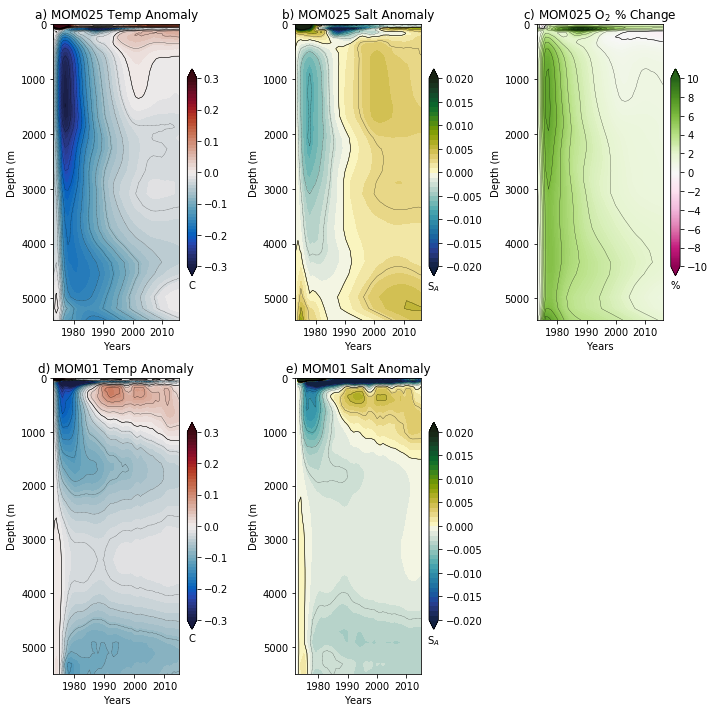

In [24]:
#plot temp hovmoeller of depth vs time
plt.figure(figsize(10,10))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

yrs=np.arange(1973,2017,1)
print(yrs.shape)

wp_os=3

a=np_pTz-np_cTz[0+wp_os:np_pTz.shape[0]+wp_os,:]
print(a.shape)

clev = np.arange(-.3,.31,.01)

plt.subplot(231)
plt.contourf(yrs[0:44],st_ocean,a[0:44,:].T,cmap=cmocean.balance,levels=clev,extend='both')
cb=plt.colorbar(ticks=np.arange(-.3,.31,.1),orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('C')
plt.contour(yrs[0:44],st_ocean,a[0:44,:].T,levels=np.arange(-.3,.325,.025),colors='k',linewidths=0.25)
plt.contour(yrs[0:44],st_ocean,a[0:44,:].T,levels=[0.0,],colors='k',linewidths=0.5)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
plt.ylim((0,5400))
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m')
plt.xlabel('Years')
plt.xticks([1980, 1990, 2000, 2010])
#plt.xlim([-75,85])
tit='a) MOM025 Temp Anomaly'
plt.title(tit)

wp_os=3

a=np_pSz-np_cSz[0+wp_os:np_pSz.shape[0]+wp_os,:]
print(a.shape)
clev = np.arange(-.02,.021,.001)

plt.subplot(232)
plt.contourf(yrs[0:44],st_ocean,a[0:44,:].T,cmap=cmocean.delta,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('S$_A$')
plt.contour(yrs[0:44],st_ocean,a[0:44,:].T,levels=np.arange(-.02,.0225,.0025),colors='k',linewidths=0.25)
plt.contour(yrs[0:44],st_ocean,a[0:44,:].T,levels=[0.0,],colors='k',linewidths=0.5)

#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.ylim((0,5400))
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.xticks([1980, 1990, 2000, 2010])
plt.ylabel('Depth (m')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='b) MOM025 Salt Anomaly'
plt.title(tit)

#print('here',np_pOz_ann.shape,np_cOz_ann.shape,nonp_pOz_ann.shape[0])
a=(np_pOz_ann-np_cOz_ann[wp_os:np_pOz_ann.shape[0]+wp_os,:])/np_cOz_ann[wp_os:np_pOz_ann.shape[0]+wp_os,:]*100
#print('here',a.shape,st_ocean.shape)

#a=(np_pOz-np_cOz[36:np_pOz.shape[0]+36,:])/np_cOz[36:np_pOz.shape[0]+36,:]*100

clev = np.arange(-10,10.1,.1)
mnths=np.arange(0,492,1)
plt.subplot(233)
#plt.contourfmnths[0:480],st_ocean,a[0:480,:].T,cmap=plt.cm.PiYG,levels=clev,extend='both')
plt.contourf(yrs[0:44],st_ocean,a[0:44,:].T,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(ticks=np.arange(-10,12,2),orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('%')
plt.contour(yrs[0:44],st_ocean,a[0:44,:].T,levels=np.arange(-10,12,1),colors='k',linewidths=0.25)
plt.contour(yrs[0:44],st_ocean,a[0:44,:].T,levels=[0.0,],colors='k',linewidths=0.5)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.ylim((0,5400))
plt.xticks([1980, 1990, 2000, 2010])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
plt.ylabel('Depth (m')
plt.xlabel('Years')
#plt.xlim([-75,85])
plt.title('c) MOM025 O$_2$ % Change')


a=mom01_pTz[0:43,:]-mom01_cTz[0:43,:]

clev = np.arange(-.3,.31,.01)
plt.subplot(234)
plt.contourf(yrs[0:43],st_ocean2,a.T,cmap=cmocean.balance,levels=clev,extend='both')
cb=plt.colorbar(ticks=np.arange(-.3,.4,.1),orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('C')
plt.contour(yrs[0:43],st_ocean2,a.T,levels=np.arange(-.3,.325,.025),colors='k',linewidths=0.25)
plt.contour(yrs[0:43],st_ocean2,a.T,levels=[0.0,],colors='k',linewidths=0.5)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.ylim((0,5500))
plt.xticks([1980, 1990, 2000, 2010])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='d) MOM01 Temp Anomaly'
plt.title(tit)

a=mom01_pSz[0:43,:]-mom01_cSz[0:43,:]

clev = np.arange(-.02,.021,.001)
plt.subplot(235)
plt.contourf(yrs[0:43],st_ocean2,a.T,cmap=cmocean.delta,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('S$_A$')
plt.contour(yrs[0:43],st_ocean2,a[0:43,:].T,levels=np.arange(-.02,.0225,.0025),colors='k',linewidths=0.25)
plt.contour(yrs[0:43],st_ocean2,a[0:43,:].T,levels=[0.0,],colors='k',linewidths=0.5)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=clev,colors='k',linewidths=0.25)
#plt.contour(yu_ocean,potrho,np.mean(cntrl_gmoc[0:4,:,:],axis=0),levels=[0.0,],colors='k',linewidths=0.5)
plt.ylim((0,5500))
plt.xticks([1980, 1990, 2000, 2010])
plt.gca().invert_yaxis()
plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.ylabel('Depth (m')
plt.xlabel('Years')
#plt.xlim([-75,85])
tit='e) MOM01 Salt Anomaly'
plt.title(tit)
plt.axis(xmin=1972,xmax=2015) 

plt.tight_layout()

of = '/g/data/v45/pas561/mom/archive/wp2_figs/Fig_Hovs.png'
plt.savefig(of,dpi=220,bbox_inches='tight')


In [15]:
clev = np.arange(-.3,.31,.01)
print(clev)

tcks = np.arange(-.3,.35,.05)
print(clev)

ticks=np.arange(-10,12,2)
print(ticks)


ticks=np.arange(-.02,.021,.005)
print(ticks)

[-3.00000000e-01 -2.90000000e-01 -2.80000000e-01 -2.70000000e-01
 -2.60000000e-01 -2.50000000e-01 -2.40000000e-01 -2.30000000e-01
 -2.20000000e-01 -2.10000000e-01 -2.00000000e-01 -1.90000000e-01
 -1.80000000e-01 -1.70000000e-01 -1.60000000e-01 -1.50000000e-01
 -1.40000000e-01 -1.30000000e-01 -1.20000000e-01 -1.10000000e-01
 -1.00000000e-01 -9.00000000e-02 -8.00000000e-02 -7.00000000e-02
 -6.00000000e-02 -5.00000000e-02 -4.00000000e-02 -3.00000000e-02
 -2.00000000e-02 -1.00000000e-02  2.77555756e-16  1.00000000e-02
  2.00000000e-02  3.00000000e-02  4.00000000e-02  5.00000000e-02
  6.00000000e-02  7.00000000e-02  8.00000000e-02  9.00000000e-02
  1.00000000e-01  1.10000000e-01  1.20000000e-01  1.30000000e-01
  1.40000000e-01  1.50000000e-01  1.60000000e-01  1.70000000e-01
  1.80000000e-01  1.90000000e-01  2.00000000e-01  2.10000000e-01
  2.20000000e-01  2.30000000e-01  2.40000000e-01  2.50000000e-01
  2.60000000e-01  2.70000000e-01  2.80000000e-01  2.90000000e-01
  3.00000000e-01]
[-3.000

In [16]:
#MOM025_NP get values at 1500 and 5500m at year 1981 and 2000
yrs=np.arange(1973,2017,1)
print(yrs.shape,yrs[8],yrs[27])

wp_os=3

a=np_pTz-np_cTz[0+wp_os:np_pTz.shape[0]+wp_os,:]
print(a.shape)
#plt.contourf(yrs[0:44],st_ocean,a[0:44,:].T,cmap=plt.cm.PiYG,levels=clev,extend='both')

print(st_ocean.shape,st_ocean[25-35])

a=np_pTz-np_cTz[0+wp_os:np_pTz.shape[0]+wp_os,:]
print(a.shape)
print('NP Temp pre 1981 1000-2000m',np.min(a[0:8,25:35]),'yr 2000 1500m',a[27,30],'yr 2000 5000m',a[27,47])

a=np_pSz-np_cSz[0+wp_os:np_pSz.shape[0]+wp_os,:]
print('NP Salt pre 1981 1000-2000m',np.min(a[0:8,25:35]),'yr 2000 1500m',a[27,30],'yr 2000 5000m',a[27,47])

a=(np_pOz_ann-np_cOz_ann[wp_os:np_pOz_ann.shape[0]+wp_os,:])/np_cOz_ann[wp_os:np_pOz_ann.shape[0]+wp_os,:]*100
print('NP O pre 1981 1000-2000m',np.max(a[0:8,25:35]),'yr 2000 1500m',a[27,30],'yr 2000 5000m',a[27,47])



((44,), 1981, 2000)
(44, 50)
((50,), 3508.633056640625)
(44, 50)
('NP Temp pre 1981 1000-2000m', -0.3002587, 'yr 2000 1500m', -0.009293348, 'yr 2000 5000m', -0.06669414)
('NP Salt pre 1981 1000-2000m', -0.0076904297, 'yr 2000 1500m', 0.0044441223, 'yr 2000 5000m', 0.0035591125)
('NP O pre 1981 1000-2000m', 7.256279382434028, 'yr 2000 1500m', 1.168058015687743, 'yr 2000 5000m', 2.4396525944754184)


In [17]:
a=nonp_pTz-nonp_cTz[0+wp_os:nonp_pTz.shape[0]+wp_os,:]
print(a.shape)
print('no NP Temp pre 1981 >5000m',np.min(a[0:8,47:]),'yr 2000 1500m',a[27,30],'yr 2000 5000m',a[27,47])

a=nonp_pSz-nonp_cSz[0+wp_os:nonp_pSz.shape[0]+wp_os,:]
print('no NP Salt pre 1981 >5000m',np.min(a[0:8,47:]),'yr 2000 1500m',a[27,30],'yr 2000 5000m',a[27,47])

a=(nonp_pOz_ann-nonp_cOz_ann[wp_os:nonp_pOz_ann.shape[0]+wp_os,:])/nonp_cOz_ann[wp_os:nonp_pOz_ann.shape[0]+wp_os,:]*100
print('no NP O pre 1981 >5000m',np.max(a[0:8,47:]),'yr 2000 1500m',a[27,30],'yr 2000 5000m',a[27,47])


(44, 50)
('no NP Temp pre 1981 >5000m', -0.305987, 'yr 2000 1500m', -0.061514914, 'yr 2000 5000m', -0.20597439)
('no NP Salt pre 1981 >5000m', -0.020114899, 'yr 2000 1500m', -0.0047950745, 'yr 2000 5000m', -0.006996155)
('no NP O pre 1981 >5000m', 7.41609908036592, 'yr 2000 1500m', 2.6195981097019545, 'yr 2000 5000m', 9.124869672111222)


In [18]:
print(st_ocean.shape,st_ocean[47:])

((50,), array([4975.20947266, 5185.11083984, 5395.02294922]))


In [19]:
print(st_ocean2.shape,st_ocean2[46:55])
print(st_ocean2.shape,st_ocean2[50])
print(st_ocean2.shape,st_ocean2[70])



((75,), array([1017.24370768, 1115.06797498, 1220.30949515, 1333.07609258,
       1453.38443981, 1581.15373743, 1716.20465096, 1858.26402924,
       2006.97519805]))
((75,), 1453.384439814726)
((75,), 4918.834912408163)


In [ ]:
a=mom01_pTz[0:29,:]-mom01_cTz[0:29,:]
print(a.shape)
#yrs[0:29]
print('mom01 Temp pre 1981 1000-2000m',np.min(a[0:8,46:55]),'yr 2000 1500m',a[27,50],'yr 2000 5000m',a[27,70])

print('mom01 Temp pre 1981 >5000m',np.min(a[0:8,70:74]))

a=mom01_pSz[0:29,:]-mom01_cSz[0:29,:]
print('mom01 salt pre 1981 1000-2000m',np.min(a[0:8,46:55]),'yr 2000 1500m',a[27,50],'yr 2000 5000m',a[27,70])
print('mom01 Temp pre 1981 >5000m',np.min(a[0:8,70:74]))


(29, 75)
('mom01 Temp pre 1981 1000-2000m', -0.16400528, 'yr 2000 1500m', -0.062756464, 'yr 2000 5000m', -0.09141204)
('mom01 Temp pre 1981 >5000m', -0.12943584)
('mom01 salt pre 1981 1000-2000m', -0.0074920654, 'yr 2000 1500m', -0.001159668, 'yr 2000 5000m', -0.0039901733)
('mom01 Temp pre 1981 >5000m', -0.0035514832)
